In [3]:
# https://keras.io/
!pip install -q keras
!pip install scikit-image
!pip install tensorflow

  Using cached tensorflow-1.5.0-cp35-cp35m-macosx_10_11_x86_64.whl
  Using cached protobuf-3.5.1-py2.py3-none-any.whl
  Using cached tensorflow_tensorboard-1.5.1-py3-none-any.whl
  Using cached bleach-1.5.0-py2.py3-none-any.whl
  Using cached Markdown-2.6.11-py2.py3-none-any.whl
  Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Found existing installation: bleach 2.1.2
    Uninstalling bleach-2.1.2:
      Successfully uninstalled bleach-2.1.2


In [329]:
import tensorflow as tf
import numpy as np
from keras.layers import Input, Dense, Flatten, Reshape, Conv2D, MaxPooling2D, UpSampling2D, Conv3D, MaxPooling3D, UpSampling3D
from keras.models import Sequential, Model
from keras import backend as K
import os.path
import matplotlib.pyplot as plt
from skimage.transform import resize
from keras.models import load_model
import h5py

In [6]:
def draw_images(images, shape = (28, 28), n=12):
  """
  params:
  > n: how many digits we will display
  """
  plt.figure(figsize=(20, 4))
  for i in range(n):
      # display original
      ax = plt.subplot(1, n, i + 1)
      plt.imshow(images[i].reshape(shape))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()

## Loading datasets from keras
### If datasets available locally, skip this section

11493376/11490434 [==============================] - 4s 0us/step
(60000, 28, 28, 1)
(10000, 28, 28, 1)


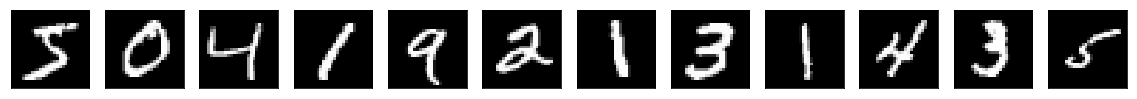

In [7]:
def load_mnist():
  # Load data
  from keras.datasets import mnist
  (x_train, _), (x_test, _) = mnist.load_data()

  x_train = x_train.astype('float32') / 255.
  x_test = x_test.astype('float32') / 255.
  x_train = x_train.reshape((len(x_train), 28, 28, 1))
  x_test = x_test.reshape((len(x_test), 28, 28, 1))
  print (x_train.shape)
  print (x_test.shape)
  return x_train, x_test

x_train_mnist, x_test_mnist = load_mnist()
draw_images(x_train_mnist)

170500096/170498071 [==============================] - 113s 1us/step
(50000, 32, 32, 3)
(10000, 32, 32, 3)


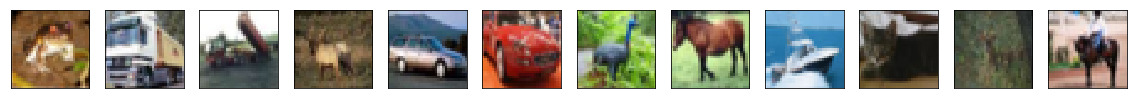

In [8]:
def load_cifar():
  from keras.datasets import cifar10
  (x_train, _), (x_test, _) = cifar10.load_data()

  x_train = x_train.astype('float32') / 255.
  x_test = x_test.astype('float32') / 255.
#   x_train = x_train.reshape((len(x_train), 32, 32, 3))
#   x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
  print(x_train.shape)
  print(x_test.shape)
  return x_train, x_test

x_train_cifar, x_test_cifar = load_cifar()
draw_images(x_train_cifar, shape=(32, 32, 3))

In [9]:
from time import sleep
import sys

def scale(x_train, scaled_shape=(14, 14, 1), original_shape=(28, 28, 1)):
  n = np.shape(x_train)[0]
  x_train_scaled = []
  for i, img in enumerate(x_train):
      x_train_scaled.append(resize(np.reshape(img, original_shape), scaled_shape, order=1, preserve_range=True, mode="constant"))
      if ((i+1)*100)%n == 0:
        sys.stdout.write('\r')
        sys.stdout.write("[%-20s] %d%%" % ('='*int((i+1)*20/n), int((i+1)*100/n)))
        sys.stdout.flush()
  x_train_scaled = np.array(x_train_scaled)
  print("\tShape:",np.shape(x_train_scaled))
  return x_train_scaled

In [10]:
# MNIST
print("Downscaling Mnist Train Dataset")
x_train_small_mnist = scale(x_train_mnist, scaled_shape=(14, 14, 1), original_shape=(28, 28, 1))
print("Downscaling Mnist Test Dataset")
x_test_small_mnist = scale(x_test_mnist, scaled_shape=(14, 14, 1), original_shape=(28, 28, 1))

Downscaling Mnist Train Dataset
[====================] 100%	Shape: (60000, 14, 14, 1)
Downscaling Mnist Test Dataset
[====================] 100%	Shape: (10000, 14, 14, 1)


In [12]:
print("Downscaling Cifar Train Dataset")
x_train_small_cifar = scale(x_train_cifar, scaled_shape=(16, 16, 3), original_shape=(32, 32, 3))
print("Downcaling Cifar Test Dataset")
x_test_small_cifar = scale(x_test_cifar, scaled_shape=(16, 16, 3), original_shape=(32, 32, 3))

Downscaling Cifar Train Dataset
[====================] 100%	Shape: (50000, 16, 16, 3)
Downcaling Cifar Test Dataset
[====================] 100%	Shape: (10000, 16, 16, 3)


In [13]:
# MNIST
# print("Upscaling Mnist Train Dataset")
# x_train_upscaled_mnist = scale(x_train_small_mnist, original_shape=(14, 14, 1), scaled_shape=(28, 28, 1))
# print("Upscaling Mnist Test Dataset")
# x_test_upscaled_mnist = scale(x_test_small_mnist, original_shape=(14, 14, 1), scaled_shape=(28, 28, 1))

print("Upscaling Cifar Train Dataset")
x_train_upscaled_cifar = scale(x_train_small_cifar, original_shape=(16, 16, 3), scaled_shape=(32, 32, 3))
print("Upscaling Cifar Test Dataset")
x_test_upscaled_cifar = scale(x_test_small_cifar, original_shape=(16, 16, 3), scaled_shape=(32, 32, 3))

Upscaling Cifar Train Dataset
[====================] 100%	Shape: (50000, 32, 32, 3)
Upscaling Cifar Test Dataset
[====================] 100%	Shape: (10000, 32, 32, 3)


In [15]:
np.save('x_train_mnist.npy', x_train_mnist) 
np.save('x_train_small_mnist.npy', x_train_small_mnist) 
np.save('x_train_upscaled_mnist.npy', x_train_upscaled_mnist)

np.save('x_train_cifar.npy', x_train_cifar) 
np.save('x_train_small_cifar.npy', x_train_small_cifar)
np.save('x_train_upscaled_cifar.npy', x_train_upscaled_cifar)

np.save('x_test_mnist.npy', x_test_mnist)
np.save('x_test_small_mnist.npy', x_test_small_mnist) 
np.save('x_test_upscaled_mnist.npy', x_test_upscaled_mnist) 

np.save('x_test_cifar.npy', x_test_cifar)
np.save('x_test_small_cifar.npy', x_test_small_cifar)
np.save('x_test_upscaled_cifar.npy', x_test_upscaled_cifar)

## Loading datasets from local file system
### If datasets available locally, skip to this section

In [17]:
x_train_mnist = np.load('x_train_mnist.npy')
x_train_small_mnist = np.load('x_train_small_mnist.npy')
x_train_upscaled_mnist = np.load('x_train_upscaled_mnist.npy')

x_train_cifar = np.load('x_train_cifar.npy')
x_train_small_cifar = np.load('x_train_small_cifar.npy')
x_train_upscaled_cifar = np.load('x_train_upscaled_cifar.npy')

x_test_mnist = np.load('x_test_mnist.npy')
x_test_small_mnist = np.load('x_test_small_mnist.npy')
x_test_upscaled_mnist = np.load('x_test_upscaled_mnist.npy')

x_test_cifar = np.load('x_test_cifar.npy')
x_test_small_cifar = np.load('x_test_small_cifar.npy')
x_test_upscaled_cifar = np.load('x_test_upscaled_cifar.npy')

## Visualise

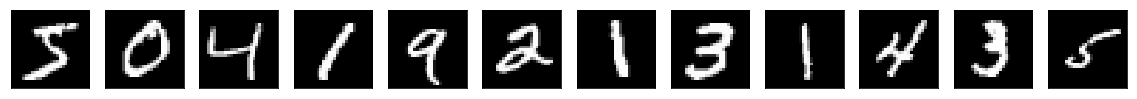

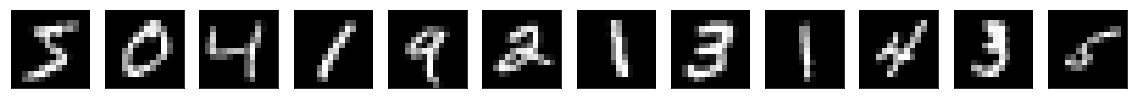

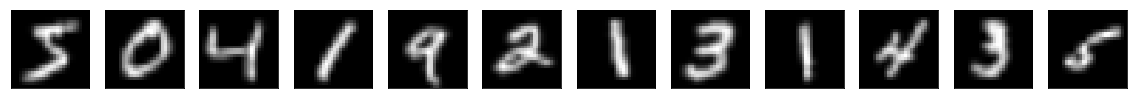

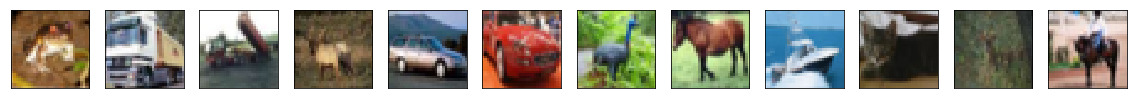

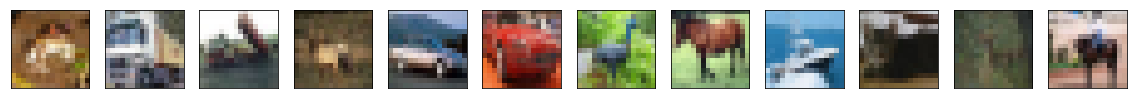

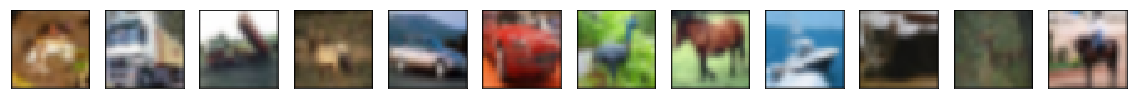

In [20]:
draw_images(x_train_mnist, shape=(28, 28))
draw_images(x_train_small_mnist, shape=(14, 14))
draw_images(x_train_upscaled_mnist, shape=(28, 28))

draw_images(x_train_cifar, shape=(32, 32, 3))
draw_images(x_train_small_cifar, shape=(16, 16, 3))
draw_images(x_train_upscaled_cifar, shape=(32, 32, 3))

In [214]:
print("Mnist")
print(np.shape(x_train_mnist))
print(np.shape(x_train_small_mnist))
print(np.shape(x_train_upscaled_mnist))
print(np.shape(x_test_mnist))
print(np.shape(x_test_small_mnist))
print(np.shape(x_test_upscaled_mnist))
print("Cifar")
print(np.shape(x_train_cifar))
print(np.shape(x_train_small_cifar))
print(np.shape(x_train_upscaled_cifar))
print(np.shape(x_test_cifar))
print(np.shape(x_test_small_cifar))
print(np.shape(x_test_upscaled_cifar))

Mnist
(60000, 28, 28, 1)
(60000, 14, 14, 1)
(60000, 28, 28, 1)
(10000, 28, 28, 1)
(10000, 14, 14, 1)
(10000, 28, 28, 1)
Cifar
(50000, 32, 32, 3)
(50000, 16, 16, 3)
(50000, 32, 32, 3)
(10000, 32, 32, 3)
(10000, 16, 16, 3)
(10000, 32, 32, 3)


# Basic CNN upscaler

In [82]:
def basic_cnn_upscaler_mnist(x_train, x_test, x_train_downscaled, x_test_downscaled, epochs=5,
                            retrain=False, model_filename="basic_cnn_upscaler_mnist.h5"):
    if os.path.isfile(model_filename) and not retrain:
        upscaler = load_model(model_filename)
        upscaler.summary()
    else:
        input_image_dim= np.shape(x_train_downscaled[0])

        conv1 = Conv2D(14, (3, 3), activation='relu', padding='same', input_shape=input_image_dim)
        upsa1 = UpSampling2D((2, 2))
        upscaled = Conv2D(1, (3, 3), activation='sigmoid', padding='same')

        upscaler = Sequential([conv1, upsa1, upscaled])
        upscaler.compile(optimizer='adadelta', loss='mean_squared_error')
        upscaler.summary()
        upscaler.fit(x_train_downscaled, x_train,
                          epochs=epochs,
                          batch_size=128,
                          shuffle=True,
                          validation_data=(x_test_downscaled, x_test))
        upscaler.save(model_filename)
    return upscaler

## Train

In [86]:
import time

ts = time.time()
my_basic_cnn_upscaler_mnist = basic_cnn_upscaler_mnist(x_train_mnist, x_test_mnist, x_train_small_mnist, x_test_small_mnist)
te = time.time()
print("Time taken: {:.2f}".format(te-ts))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 14, 14, 14)        140       
_________________________________________________________________
up_sampling2d_11 (UpSampling (None, 28, 28, 14)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 28, 28, 1)         127       
Total params: 267
Trainable params: 267
Non-trainable params: 0
_________________________________________________________________
Time taken: 2.16


## Results

In [56]:
predictions = my_basic_cnn_upscaler_mnist.predict(x_test_small_mnist)

Downscaled


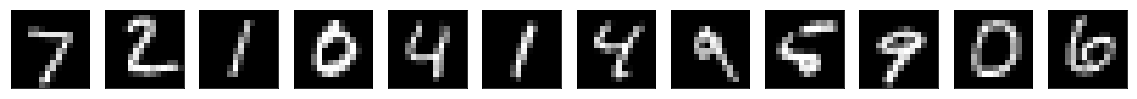

Predictions


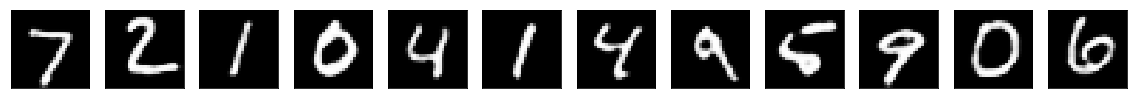

Original


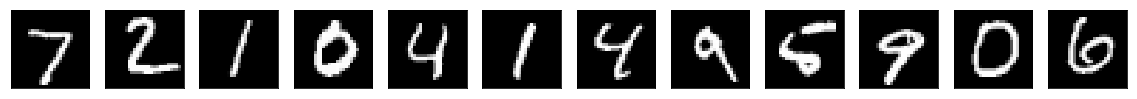

In [57]:
print("Downscaled")
draw_images(x_test_small_mnist, shape=(14,14))
print("Predictions")
draw_images(predictions, shape=(28,28))
print("Original")
draw_images(x_test_mnist, shape=(28,28))

# Basic CNN upscaler for Cifar

In [359]:
def basic_cnn_upscaler_cifar(x_train, x_test, x_train_downscaled, x_test_downscaled, epochs=400,
                            retrain=False, model_filename="basic_cnn_upscaler_cifar3_sub1.h5"):
    if os.path.isfile(model_filename) and not retrain:
        upscaler = load_model(model_filename)
    else:
        input_shape = np.shape(x_train_downscaled)
#         x_train_downscaled = np.reshape(x_train_downscaled, (input_shape[0], np.prod(input_shape[1:])))
#         x_test_downscaled = np.reshape(x_test_downscaled, (np.shape(x_test_downscaled)[0], np.prod(input_shape[1:])))
#         x_train = np.reshape(x_train, (np.shape(x_train)[0], np.prod(input_shape[1:])))
#         x_test = np.reshape(x_test, (np.shape(x_test)[0], np.prod(input_shape[1:])))

        input_image_dim = np.shape(x_train_downscaled[0])
        print("Image dim: ", input_image_dim)

        conv1 = Conv2D(3, (3, 3), activation='relu', padding='same', input_shape=input_image_dim, data_format="channels_last")
#         conv2 = Conv2D(64*3, (3, 3), activation='relu', padding='same', data_format="channels_last")
#         flat = Flatten(input_shape=input_image_dim)
        flat = Flatten()
        dense = Dense(np.prod(input_shape[1:]), activation='sigmoid')
        #       conv3 = Conv2D(90, (3, 3), activation='relu', padding='same', data_format="channels_last")
        #         conv2 = Conv2D(18, (3, 3), activation='relu', padding='same', data_format="channels_last")
#         upscaled1 = Conv2D(3, (3, 3), activation='sigmoid', padding='same', data_format="channels_last")
#         upscaled2 = Conv2D(3, (3, 3), activation='sigmoid', padding='same', data_format="channels_last")
        reshape = Reshape(input_image_dim)
    
        upscaler = Sequential([conv1, flat, dense, reshape])
        upscaler.compile(optimizer='adadelta', loss='mean_squared_error')

        print(x_train_downscaled.shape, np.shape(x_train))
        upscaler.summary()
        upscaler.fit(x_train_downscaled, x_train,
                          epochs=epochs,
                          batch_size=16,
                          shuffle=True,
                          validation_data=(x_test_downscaled, x_test))
        upscaler.save(model_filename)
        return upscaler

## Train

In [360]:
import time

ts = time.time()
my_basic_cnn_upscaler_cifar = basic_cnn_upscaler_cifar(x_train_cifar[:30], x_test_cifar[:30], x_train_upscaled_cifar[:30], x_test_upscaled_cifar[:30], retrain=True)
te = time.time()
print("{:10.2f}".format(te-ts))

Image dim:  (32, 32, 3)
(30, 32, 32, 3) (30, 32, 32, 3)
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_171 (Conv2D)          (None, 32, 32, 3)         84        
_________________________________________________________________
flatten_9 (Flatten)          (None, 3072)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 3072)              9440256   
_________________________________________________________________
reshape_9 (Reshape)          (None, 32, 32, 3)         0         
Total params: 9,440,340
Trainable params: 9,440,340
Non-trainable params: 0
_________________________________________________________________
Train on 30 samples, validate on 30 samples
Epoch 1/400
30/30 [==============================] - 4s 120ms/step - loss: 0.0713 - val_loss: 0.0696
Epoch 2/400
30/30 [==============================] - 0s 15ms/st

30/30 [==============================] - 0s 14ms/step - loss: 0.0668 - val_loss: 0.0670
Epoch 73/400
30/30 [==============================] - 0s 14ms/step - loss: 0.0667 - val_loss: 0.0670
Epoch 74/400
30/30 [==============================] - 0s 14ms/step - loss: 0.0666 - val_loss: 0.0670
Epoch 75/400
30/30 [==============================] - 0s 13ms/step - loss: 0.0665 - val_loss: 0.0670
Epoch 76/400
30/30 [==============================] - 0s 14ms/step - loss: 0.0664 - val_loss: 0.0670
Epoch 77/400
30/30 [==============================] - 0s 14ms/step - loss: 0.0664 - val_loss: 0.0670
Epoch 78/400
30/30 [==============================] - 0s 14ms/step - loss: 0.0663 - val_loss: 0.0670
Epoch 79/400
30/30 [==============================] - 0s 14ms/step - loss: 0.0662 - val_loss: 0.0670
Epoch 80/400
30/30 [==============================] - 0s 13ms/step - loss: 0.0661 - val_loss: 0.0670
Epoch 81/400
30/30 [==============================] - 0s 14ms/step - loss: 0.0660 - val_loss: 0.0670
Epo

30/30 [==============================] - 0s 16ms/step - loss: 0.0563 - val_loss: 0.0653
Epoch 153/400
30/30 [==============================] - 0s 14ms/step - loss: 0.0562 - val_loss: 0.0653
Epoch 154/400
30/30 [==============================] - 0s 14ms/step - loss: 0.0561 - val_loss: 0.0652
Epoch 155/400
30/30 [==============================] - 0s 14ms/step - loss: 0.0560 - val_loss: 0.0652
Epoch 156/400
30/30 [==============================] - 0s 14ms/step - loss: 0.0558 - val_loss: 0.0651
Epoch 157/400
30/30 [==============================] - 0s 14ms/step - loss: 0.0558 - val_loss: 0.0650
Epoch 158/400
30/30 [==============================] - 0s 14ms/step - loss: 0.0556 - val_loss: 0.0650
Epoch 159/400
30/30 [==============================] - 0s 14ms/step - loss: 0.0554 - val_loss: 0.0649
Epoch 160/400
30/30 [==============================] - 0s 14ms/step - loss: 0.0553 - val_loss: 0.0648
Epoch 161/400
30/30 [==============================] - 0s 14ms/step - loss: 0.0552 - val_loss: 0

30/30 [==============================] - 0s 14ms/step - loss: 0.0436 - val_loss: 0.0575
Epoch 233/400
30/30 [==============================] - 0s 14ms/step - loss: 0.0434 - val_loss: 0.0574
Epoch 234/400
30/30 [==============================] - 0s 13ms/step - loss: 0.0432 - val_loss: 0.0573
Epoch 235/400
30/30 [==============================] - 0s 14ms/step - loss: 0.0430 - val_loss: 0.0571
Epoch 236/400
30/30 [==============================] - 0s 13ms/step - loss: 0.0428 - val_loss: 0.0570
Epoch 237/400
30/30 [==============================] - 0s 14ms/step - loss: 0.0427 - val_loss: 0.0569
Epoch 238/400
30/30 [==============================] - 0s 14ms/step - loss: 0.0425 - val_loss: 0.0568
Epoch 239/400
30/30 [==============================] - 0s 14ms/step - loss: 0.0423 - val_loss: 0.0567
Epoch 240/400
30/30 [==============================] - 0s 14ms/step - loss: 0.0420 - val_loss: 0.0565
Epoch 241/400
30/30 [==============================] - 0s 14ms/step - loss: 0.0419 - val_loss: 0

30/30 [==============================] - 0s 15ms/step - loss: 0.0306 - val_loss: 0.0495
Epoch 313/400
30/30 [==============================] - 0s 14ms/step - loss: 0.0305 - val_loss: 0.0494
Epoch 314/400
30/30 [==============================] - 0s 14ms/step - loss: 0.0304 - val_loss: 0.0494
Epoch 315/400
30/30 [==============================] - 0s 15ms/step - loss: 0.0302 - val_loss: 0.0494
Epoch 316/400
30/30 [==============================] - 0s 15ms/step - loss: 0.0301 - val_loss: 0.0493
Epoch 317/400
30/30 [==============================] - 0s 14ms/step - loss: 0.0300 - val_loss: 0.0492
Epoch 318/400
30/30 [==============================] - 0s 14ms/step - loss: 0.0300 - val_loss: 0.0492
Epoch 319/400
30/30 [==============================] - 0s 15ms/step - loss: 0.0299 - val_loss: 0.0492
Epoch 320/400
30/30 [==============================] - 0s 15ms/step - loss: 0.0296 - val_loss: 0.0491
Epoch 321/400
30/30 [==============================] - 0s 15ms/step - loss: 0.0295 - val_loss: 0

30/30 [==============================] - 0s 14ms/step - loss: 0.0226 - val_loss: 0.0455
Epoch 393/400
30/30 [==============================] - 1s 25ms/step - loss: 0.0224 - val_loss: 0.0454
Epoch 394/400
30/30 [==============================] - 0s 16ms/step - loss: 0.0223 - val_loss: 0.0455
Epoch 395/400
30/30 [==============================] - 0s 15ms/step - loss: 0.0222 - val_loss: 0.0454
Epoch 396/400
30/30 [==============================] - 0s 15ms/step - loss: 0.0222 - val_loss: 0.0455
Epoch 397/400
30/30 [==============================] - 0s 16ms/step - loss: 0.0220 - val_loss: 0.0454
Epoch 398/400
30/30 [==============================] - 1s 17ms/step - loss: 0.0219 - val_loss: 0.0453
Epoch 399/400
30/30 [==============================] - 1s 17ms/step - loss: 0.0219 - val_loss: 0.0453
Epoch 400/400
30/30 [==============================] - 0s 15ms/step - loss: 0.0218 - val_loss: 0.0452
    192.42


## Results

In [363]:
predictions = my_basic_cnn_upscaler_cifar.predict(x_test_upscaled_cifar[:20])

Downscaled


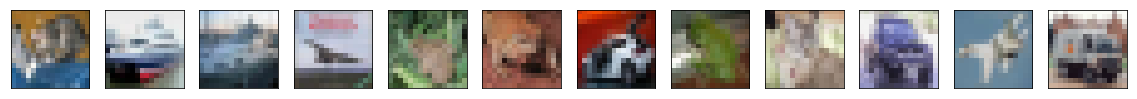

Upscaled


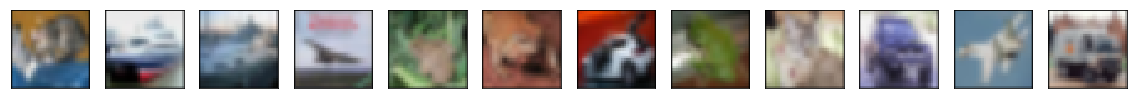

Predictions


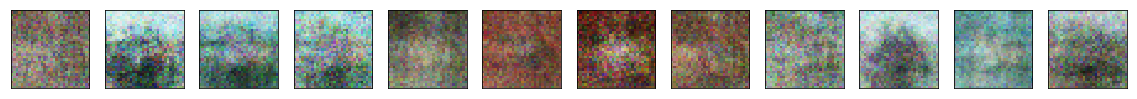

Original


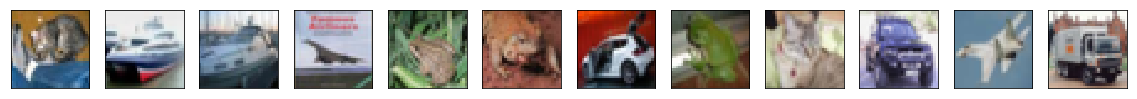

In [364]:
print("Downscaled")
draw_images(x_test_small_cifar, shape=(16, 16, 3))
print("Upscaled")
draw_images(x_test_upscaled_cifar, shape=(32, 32, 3))
print("Predictions")
draw_images(predictions, shape=(32, 32, 3))
print("Original")
draw_images(x_test_cifar, shape=(32, 32, 3))

Downscaled


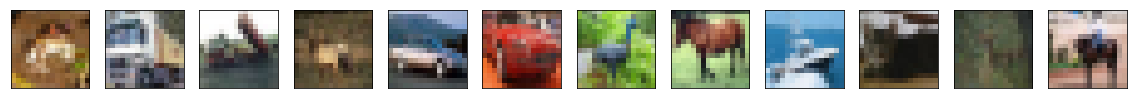

Upscaled


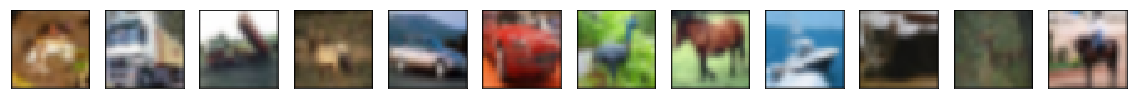

Predictions


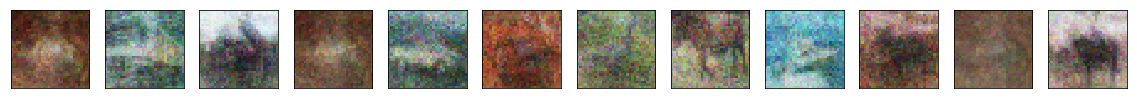

Original


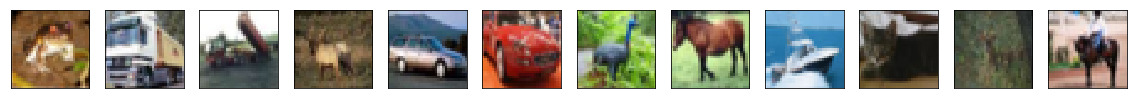

In [366]:
predictions = my_basic_cnn_upscaler_cifar.predict(x_train_upscaled_cifar[:12])
print("Downscaled")
draw_images(x_train_small_cifar, shape=(16, 16, 3))
print("Upscaled")
draw_images(x_train_upscaled_cifar, shape=(32, 32, 3))
print("Predictions")
draw_images(predictions, shape=(32, 32, 3))
print("Original")
draw_images(x_train_cifar, shape=(32, 32, 3))